In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [9]:
df_invc = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Capstone/Final_invoice.csv')
df_invc.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,0:00:00,0.0,0.0,0.0,0.0,NaN,02-01-15,7005200002,11:30:36,168303,13-12-14,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,0.0,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,0.0,0.0,0.0,0.0,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,0:00:00,0.0,0.0,0.0,0.0,NaN,03-01-15,7005200003,10:07:32,173997,02-01-15,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,0:00:00,0.0,0.0,0.0,0.0,NaN,03-01-15,7005200004,11:12:57,173889,02-01-15,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,0.0,52.95,400607,BC01,THANE,NaN,NO,0.0,AP09AX0582,0.0,0.0,0.0,0.0,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,0:00:00,0.0,0.0,0.0,0.0,NaN,03-01-15,7005200005,11:40:44,174158,03-01-15,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,0:00:00,0.0,0.0,0.0,0.0,NaN,03-01-15,7005200006,12:07:17,173860,02-01-15,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,0.0,944.16,400603,BC01,THANE,NaN,NO,0.0,MH04CD9768,0.0,0.0,0.0,0.0,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [11]:
df_invc.isnull().sum()

Unnamed: 0                   0
Amt Rcvd From Custom    197286
Amt Rcvd From Ins Co    197286
Area / Locality          23890
CGST(14%)               197286
CGST(2.5%)              197286
CGST(6%)                197286
CGST(9%)                197286
CITY                         1
Cash /Cashless Type     464894
Claim No.               487510
Cust Type                    0
Customer No.                 0
District                     0
Expiry Date             470083
Gate Pass Date          451399
Gate Pass Time               0
IGST(12%)               197286
IGST(18%)               197286
IGST(28%)               197286
IGST(5%)                197286
Insurance Company       468723
Invoice Date                 0
Invoice No                   0
Invoice Time                 0
Job Card No                  0
JobCard Date                 0
JobCard Time                 0
KMs Reading                  0
Labour Total                 0
Make                         0
Misc Total                   0
Model   

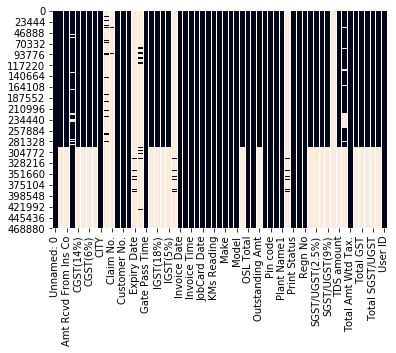

In [7]:
import seaborn as sns
sns.heatmap(df_invc.isnull(), cbar=False)

In [0]:
#df_cust.fillna(df_cust.mean(), inplace=True)
#df_cust.drop(columns=['Date of Birth','Death date'], inplace=True)
#df_cust['Data Origin'] = df_cust['Data Origin'].fillna(0)

In [13]:
df_invc.groupby(['Order Type'])['Order Type'].count()#.apply(lambda x: '%.3f' % x)

Order Type
Accidental            44159
Mechanical            15100
Paid Service         135004
Repeat Order           3043
Running Repairs      269455
SMC Redemption        15738
SMC Value Package      9781
WBW Order                17
Workshop Damage          17
Name: Order Type, dtype: int64

In [0]:
df_invc.groupby(['District','Plant'])['Plant'].count()

District              Plant
Andaman and Nico.In.  X018       3
                      X063       1
                      X064       1
                      X136       2
                      X203       1
                              ... 
West Bengal           X277     380
                      X308       3
                      X359       5
                      X364       1
                      X366       5
Name: Plant, Length: 1419, dtype: int64

In [0]:
df_invc.groupby(['Make','Model','Order Type'])['Labour Total'].sum().apply(lambda x: '%.3f' % x)

Make   Model       Order Type     
AUDI   A4          Accidental         135286.410
                   Mechanical           7799.220
                   Paid Service         7713.130
                   Running Repairs     57687.290
       A6          Accidental         204128.010
                                         ...    
VOLVO  VOLVO S80   Paid Service         3617.440
                   Running Repairs      1577.500
       VOLVO XC90  Accidental          17403.140
                   Paid Service         1480.000
                   Running Repairs     25840.490
Name: Labour Total, Length: 1191, dtype: object

In [0]:
b=df_invc.groupby(['Order Type'])['Labour Total'].median()
b
#.sum().apply(lambda x: '%.3f' % x)

Order Type
Accidental           1300.070
Mechanical            445.035
Paid Service          989.990
Repeat Order            0.000
Running Repairs       304.400
SMC Redemption          0.000
SMC Value Package    1062.060
WBW Order             972.060
Workshop Damage         0.000
Name: Labour Total, dtype: float64

In [0]:
df_invc['Labour Median'] = df_invc['Labour Total'].median()

In [0]:
df_invc.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID,Labour Median
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,0:00:00,0.0,0.0,0.0,0.0,NaN,02-01-15,7005200002,11:30:36,168303,13-12-14,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,0.0,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,0.0,0.0,0.0,0.0,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1,537.99
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,0:00:00,0.0,0.0,0.0,0.0,NaN,03-01-15,7005200003,10:07:32,173997,02-01-15,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2,537.99
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,0:00:00,0.0,0.0,0.0,0.0,NaN,03-01-15,7005200004,11:12:57,173889,02-01-15,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,0.0,52.95,400607,BC01,THANE,NaN,NO,0.0,AP09AX0582,0.0,0.0,0.0,0.0,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2,537.99
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,0:00:00,0.0,0.0,0.0,0.0,NaN,03-01-15,7005200005,11:40:44,174158,03-01-15,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2,537.99
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,0:00:00,0.0,0.0,0.0,0.0,NaN,03-01-15,7005200006,12:07:17,173860,02-01-15,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,0.0,944.16,400603,BC01,THANE,NaN,NO,0.0,MH04CD9768,0.0,0.0,0.0,0.0,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2,537.99


In [0]:
a=df_invc.groupby(['Make'])['Labour Total'].median()
a

Make
AUDI                     387.825
BMW                      477.920
DAEWOO                   599.190
FIAT                     555.280
FORCE                    348.730
FORD                     549.995
GENERAL MOTORS           555.950
HINDUSTAN MOTORS         348.640
HONDA                    533.970
HYUNDAI                  554.910
JEEP                       0.000
LAND ROVER               761.700
MAHINDRA &  MAHINDRA     694.885
MARUTI SUZUKI            449.500
MERCEDES BENZ            550.125
MITSUBISHI MOTORS        563.410
MORRIS                   329.320
NISSAN                   443.995
PORCHE                  1983.685
PREMIER AUTOMOBILES      879.070
RENAULT                  346.970
SAN MOTORS               432.170
SKODA                    500.200
SONALIKA                 674.740
TATA MOTORS              498.655
TOYOTA                   361.315
VOLKSWAGEN               400.570
VOLVO                    444.120
Name: Labour Total, dtype: float64

In [0]:
a.nlargest(5)

Make
PORCHE                  1983.685
PREMIER AUTOMOBILES      879.070
LAND ROVER               761.700
MAHINDRA &  MAHINDRA     694.885
SONALIKA                 674.740
Name: Labour Total, dtype: float64

In [0]:
c=df_invc.groupby(['District'])['Labour Total'].median()
c

District
Andaman and Nico.In.     390.670
Andhra Pradesh           590.125
Arunachal Pradesh        373.570
Assam                    223.450
Bihar                    450.370
Chandigarh               399.140
Chhattisgarh             309.915
Dadra and Nagar Hav.     667.500
Daman and Diu            596.330
Delhi                    249.220
Goa                      377.505
Gujarat                  614.110
Haryana                  249.220
Himachal Pradesh         310.680
Jammu and Kashmir        699.100
Jharkhand                354.050
Karnataka                298.000
Kerala                   809.265
Lakshadweep              566.000
Madhya Pradesh           336.735
Maharashtra              605.240
Manipur                 4138.920
Megalaya                 699.080
Mizoram                 1401.885
Nagaland                 700.215
Odisha                   485.150
Puducherry                 0.000
Punjab                   390.500
Rajasthan                173.905
Sikkim                    82.415
T

In [0]:
df_invc[df_invc['Order Type'] == 'Paid Service'].groupby(df_invc['District'])['Labour Total'].median()

District
Andaman and Nico.In.     3384.980
Andhra Pradesh            910.050
Arunachal Pradesh        1064.590
Assam                     202.635
Bihar                     594.950
Chandigarh               1179.810
Chhattisgarh              350.000
Dadra and Nagar Hav.      999.960
Daman and Diu            1000.345
Delhi                    1010.015
Goa                       377.505
Gujarat                   800.035
Haryana                   998.160
Himachal Pradesh          859.060
Jammu and Kashmir         859.060
Jharkhand                   0.000
Karnataka                 854.270
Kerala                   2191.470
Lakshadweep              1934.485
Madhya Pradesh            645.530
Maharashtra               999.130
Manipur                 10753.790
Megalaya                 1036.035
Mizoram                  1401.885
Nagaland                  920.720
Odisha                    384.060
Puducherry                  0.000
Punjab                   1059.170
Rajasthan                 555.880
Sikki

In [0]:
df6=df_invc[(df_invc['KMs Reading'] >= 10000) & (df_invc['KMs Reading'] <= 20000) & (df_invc['Order Type'] == 'Paid Service','') ]
df6

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID,Labour Median
34,34,0.0,0.0,MUMBAI,0.0,0.0,0.0,0.0,MUMBAI,NaN,NaN,Retail,63302,Maharashtra,NaN,NaN,0:00:00,0.0,0.0,0.0,0.0,NaN,05-01-15,7005200036,16:20:57,174800,05-01-15,13:48:35,17311,1471.18,VOLKSWAGEN,0.00,POLO,7.005200e+09,0.00,Paid Service,0.0,0.00,400012,BC01,THANE,NaN,NO,0.0,MH01AV8453,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,1471.18,0.0,0.0,0.0,0.0,1471.18,BC01SA1,537.99
51,51,0.0,0.0,MUMBAI,0.0,0.0,0.0,0.0,POWAI,NaN,NaN,Retail,85371,Maharashtra,NaN,NaN,0:00:00,0.0,0.0,0.0,0.0,NaN,09-01-15,7005200053,17:55:45,175874,08-01-15,15:52:17,11801,2070.97,VOLKSWAGEN,100.00,POLO,7.005200e+09,1643.97,Paid Service,0.0,3278.68,400089,BC01,THANE,NaN,NO,0.0,MH43AL9453,0.0,0.0,0.0,0.0,NaN,0.0,RUPESH,7093.62,0.0,0.0,0.0,0.0,7093.62,BC01SA1,537.99
73,73,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,8261,Maharashtra,NaN,NaN,0:00:00,0.0,0.0,0.0,0.0,NaN,11-01-15,7005200075,17:27:03,176653,11-01-15,12:51:02,18916,698.88,TATA MOTORS,49.99,VISTA,7.005200e+09,499.92,Paid Service,0.0,1182.94,400606,BC01,THANE,NaN,NO,0.0,MH04EF852,0.0,0.0,0.0,0.0,NaN,0.0,ANANTA,2431.73,0.0,0.0,0.0,0.0,2431.73,BC01SA2,537.99
187,187,0.0,0.0,PAWAR NAGAR,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,72189,Maharashtra,NaN,NaN,0:00:00,0.0,0.0,0.0,0.0,NaN,24-01-15,7005200189,18:49:41,180401,24-01-15,11:57:21,14195,1202.88,MARUTI SUZUKI,49.99,WAGONR,7.005200e+09,499.95,Paid Service,0.0,1064.44,400607,BC01,THANE,NaN,NO,0.0,MH04DJ4062,0.0,0.0,0.0,0.0,NaN,0.0,HARSHAD,2817.26,0.0,0.0,0.0,0.0,2817.26,BC01SA1,537.99
213,213,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,87743,Maharashtra,NaN,NaN,0:00:00,0.0,0.0,0.0,0.0,NaN,27-01-15,7005200215,16:11:29,180867,27-01-15,11:13:01,12050,1254.37,GENERAL MOTORS,0.00,BEAT,7.005200e+09,0.00,Paid Service,0.0,104.56,400603,BC01,THANE,NaN,NO,0.0,MH04ET6929,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,1358.93,0.0,0.0,0.0,0.0,1358.93,BC01SA2,537.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492156,984583,NaN,NaN,SURAT,NaN,NaN,NaN,NaN,SURAT,NaN,NaN,Retail,172757,Gujarat,NaN,NaN,0:00:00,NaN,NaN,NaN,NaN,NaN,30-06-16,7205801324,19:47:52,400877,30-06-16,17:07:02,15838,805.11,MARUTI SUZUKI,0.00,RITZ,NaN,0.00,Paid Service,NaN,695.74,395007,X279,X279 - J B CAR CARE,NaN,NO,0.0,GJ5JN6713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.85,NaN,NaN,NaN,NaN,NaN,X279WM1,537.99
492264,984691,NaN,NaN,NIZAMABAD,NaN,NaN,NaN,NaN,NIZAMABAD,NaN,NaN,Retail,200851,Telangana,NaN,NaN,0:00:00,NaN,NaN,NaN,NaN,NaN,28-06-16,7227200050,15:38:48,395154,23-06-16,11:12:13,19820,608.43,HYUNDAI,0.00,SANTRO,NaN,0.00,Paid Service,NaN,1041.32,503230,X386,X386 - VINAYAKA MOTORS,NaN,NO,0.0,AP28BY3391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1649.75,NaN,NaN,NaN,NaN,NaN,X386SA1,537.99
492292,984719,NaN,NaN,NEW AVADI RD,NaN,NaN,NaN,NaN,"KILPAUK, CHENNAI",NaN,NaN,Retail,203807,Tamil Nadu,NaN,NaN,0:00:00,NaN,NaN,NaN,NaN,NaN,30-06-16,7231000000,10:37:11,400073,30-06-16,7:50:19,13409,864.45,NISSAN,245.98,SUPER SUNNY,NaN,0.00,Paid Service,NaN,812.22,600010,X405,X405 - NANGAN MOTORS PVT. LTD.,NaN,NO,0.0,TN01AT5168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1922.65,NaN,NaN,NaN,NaN,NaN,X405SA1,537.99
492307,984734,NaN,NaN,KONNUR HIGH ROAD,NaN,Na

In [0]:
aa=df_invc.groupby(['Make','Order Type'])['Order Type'].count()
aa

Make        Order Type       
AUDI        Accidental            56
            Mechanical             8
            Paid Service          31
            Running Repairs      125
BMW         Accidental            65
                                ... 
VOLKSWAGEN  SMC Redemption        61
            SMC Value Package     44
VOLVO       Accidental             2
            Paid Service           3
            Running Repairs       14
Name: Order Type, Length: 161, dtype: int64

In [0]:
aa.nlargest(5)

Make                  Order Type     
MARUTI SUZUKI         Running Repairs    79972
MAHINDRA &  MAHINDRA  Running Repairs    47922
HYUNDAI               Running Repairs    44083
MARUTI SUZUKI         Paid Service       41446
TATA MOTORS           Running Repairs    34031
Name: Order Type, dtype: int64